# 1次元ガウス分布の作図

- 執筆期間：2022/01/29 - 2022/01/31

In [1]:
# 更新日時を出力
import datetime
now = datetime.datetime.now()
print('更新日時：' + '{0:%Y-%m-%d %H:%M}'.format(now))

更新日時：2022-01-31 07:29


# 1次元ガウス分布

　1次元ガウス分布(Gaussian Distribution)の計算と作図を行います。  
<br>

　利用するライブラリを読み込みます。

In [2]:
# 利用するライブラリ
import numpy as np
from scipy.stats import norm # 1次元ガウス分布
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

　分布の変化をアニメーション(gif画像)で確認するのに`matplotlib`ライブラリの`animation`モジュールを利用します。不要であれば省略してください。  
<br>

## 定義式の確認

　まずは、1次元ガウス分布の定義式を確認します。  
<br>

　1次元ガウス分布は、次の式で定義されます。

$$
\mathcal{N}(x | \mu, \sigma^2)
    = \frac{1}{\sqrt{2 \pi \sigma^2}}
      \exp \left(
          - \frac{1}{2 \sigma^2}
            (x - \mu)^2
      \right)
$$

　ここで、$\mu$は平均、$\sigma$は標準偏差、$\sigma^2$は分散です。  
　確率変数の値$x$は実数となります。平均パラメータ$\mu$は実数、標準偏差パラメータ$\sigma$は0より大きい値$\sigma > 0$を満たす必要があります。  

　この式の対数をとると、次の式になります。

$$
\log \mathcal{N}(x | \mu, \sigma^2)
    = - \frac{1}{2} \left\{
          \log (2 \pi)
          + \log \sigma^2
          + \frac{(x - \mu)^2}{\sigma^2}
      \right\} 
$$

　1次元ガウス分布の平均と分散は、次の式で計算できます。

$$
\begin{aligned}
\mathbb{E}[x]
   &= \mu
\\
\mathbb{V}[x]
   &= \sigma^2
\end{aligned}
$$

<br>

　1次元ガウス分布は、実数$x$を生成することから、1次元ガウス分布の平均パラメータの事前分布として利用されます。  
<br>

## 確率密度の計算

　1次元ガウス分布に従う確率密度を計算する方法をいくつか確認します。  
<br>

　パラメータを設定します。

In [3]:
# 平均を指定
mu = 1.0

# 標準偏差を指定
sigma = 2.5

# 確率変数の値を指定
x = 1.0

　1次元ガウス分布の平均パラメータ$\mu$、標準偏差パラメータ$\sigma > 0$、確率変数がとり得る値$x$を指定します。設定した値に従う確率密度を計算します。  

　まずは、定義式から確率密度を計算します。

In [4]:
# 定義式により確率密度を計算
C = 1.0 / np.sqrt(2.0 * np.pi * sigma**2)
dens = C * np.exp(-0.5 * (x - mu)**2 / sigma**2)
print(dens)

0.15957691216057307


　1次元ガウス分布の定義式

$$
\begin{aligned}
C_{\mathcal{N}}
   &= \frac{1}{\sqrt{2 \pi \sigma^2}}
\\
\mathcal{N}(x | \mu, \sigma^2)
   &= C_{\mathcal{N}}
      \exp \left(
          - \frac{1}{2 \sigma^2}
            (x - \mu)^2
      \right)
\end{aligned}
$$

で計算します。$C_{\mathcal{N}}$は1次元ガウス分布の正規化係数、$\pi$は円周率です。  

　対数をとった定義式から計算します。

In [5]:
# 対数をとった定義式により確率密度を計算
log_C = -0.5 * np.log(2.0 * np.pi) - np.log(sigma)
log_dens = log_C - 0.5 * (x - mu)**2 / sigma**2
dens = np.exp(log_dens)
print(dens, log_dens)

0.15957691216057307 -1.8352292650788278


　対数をとった定義式

$$
\begin{aligned}
\log C_{\mathcal{N}}
   &= - \frac{1}{2} \log (2 \pi)
      - \log \sigma
\\
\log \mathcal{N}(x | \mu, \sigma^2)
   &= \log C_{\mathcal{N}}
      - \frac{1}{2 \sigma^2}
        (x - \mu)^2
\end{aligned}
$$

を計算します。計算結果の指数をとると確率が得られます。

$$
\mathcal{N}(x | \mu, \sigma^2)
    = \exp \Bigr(
          \log \mathcal{N}(x | \mu, \sigma^2)
      \Bigr)
$$

　指数と対数の性質より$\exp(\log x) = x$です。  

　次は、`SciPy`ライブラリのモジュールを使って確率を計算します。  
　1次元ガウス分布のモジュール`norm`の確率密度メソッド`pdf()`を使って計算します。

In [6]:
# ガウス分布の関数により確率密度を計算
dens = norm.pdf(x=x, loc=mu, scale=sigma)
print(dens)

0.15957691216057307


　変数の引数`x`に`x`、平均の引数`loc`に`mu`、標準偏差の引数`scale`に`sigma`を指定します。  

　`logpdf()`だと対数をとった確率密度を計算します。

In [7]:
# ガウス分布の対数をとった関数により確率密度を計算
log_dens = norm.logpdf(x=x, loc=mu, scale=sigma)
dens = np.exp(log_dens)
print(dens, log_dens)

0.15957691216057307 -1.8352292650788278


　計算結果の指数をとると確率密度が得られます。  
<br>

## 統計量の計算

　1次元ガウス分布の平均と分散を計算します。  
<br>

　平均を計算します。

In [8]:
# 計算式により平均を計算
E_x = mu
print(E_x)

1.0


　1次元ガウス分布の平均は、定義より$\mu$です。

$$
\mathbb{E}[x]
    = \mu
$$

　分散を計算します。

In [9]:
# 計算式により分散を計算
V_x = sigma**2
print(V_x)

6.25


　1次元ガウス分布の分散は、定義より$\sigma$の2乗です。

$$
\mathbb{V}[x]
    = \sigma^2
$$

　1次元ガウス分布のモジュールの平均メソッド`mean()`でも平均を計算できます。

In [10]:
# 関数により平均を計算
E_x = norm.mean(loc=mu)
print(E_x)

1.0


　確率メソッドと同様に引数を指定します。  

　分散メソッド`var()`で分散を計算します。

In [11]:
# 関数により分散を計算
V_x = norm.var(scale=sigma)
print(V_x)

6.25


　こちらも同様に引数を指定します。  
<br>

## 分布の可視化

　`Matplotlib`ライブラリの`PyPlot`モジュールを利用して1次元ガウス分布のグラフを作成します。  
<br>

　1次元ガウス分布の確率変数がとり得る値$x$ごとの確率を計算します。

In [12]:
# 平均を指定
mu = 0.0

# 標準偏差を指定
sigma = 1.0

# 作図用のxの点を作成
x_vals = np.linspace(start=mu - sigma*4.0, stop=mu + sigma*4.0, num=250)
print(x_vals[:5])

# ガウス分布を計算
density = norm.pdf(x=x_vals, loc=mu, scale=sigma)
print(density[:5])

[-4.         -3.96787149 -3.93574297 -3.90361446 -3.87148594]
[0.00013383 0.0001521  0.0001727  0.00019587 0.00022193]


　$x$がとり得る値を作成して`x_vals`とします。この例では、平均`mu`を中心に標準偏差`sigma`の`4`倍を範囲とします。  
　`x_vals`の各要素に対応する確率密度を求めます。  

　 1次元ガウス分布のグラフを作成します。

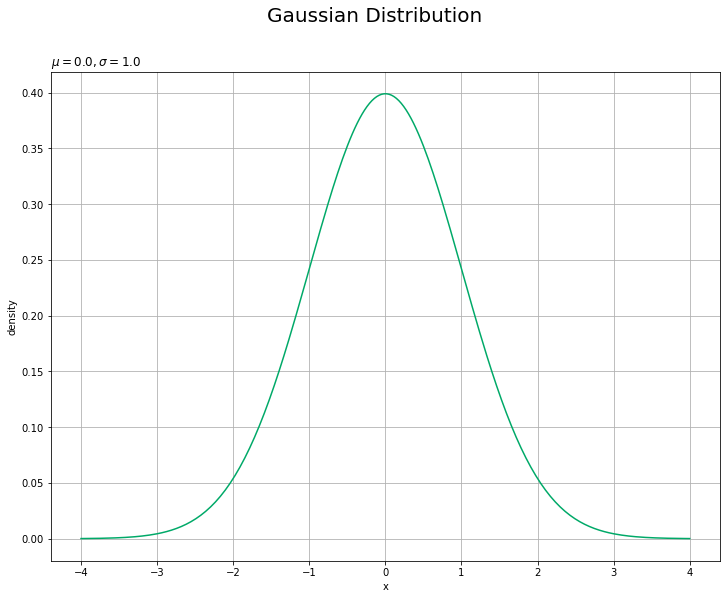

In [13]:
# ガウス分布を作図
plt.figure(figsize=(12, 9)) # 図の設定
plt.plot(x_vals, density, color='#00A968') # 折れ線グラフ
plt.xlabel('x') # x軸ラベル
plt.ylabel('density') # y軸ラベル
plt.suptitle('Gaussian Distribution', fontsize=20) # 全体のタイトル
plt.title('$\mu=' + str(mu) + ', \sigma=' + str(sigma) + '$', loc='left') # タイトル
plt.grid() # グリッド線
plt.show() # 描画

<br>

　この分布に平均と最頻値、標準偏差の情報を重ねて表示します。

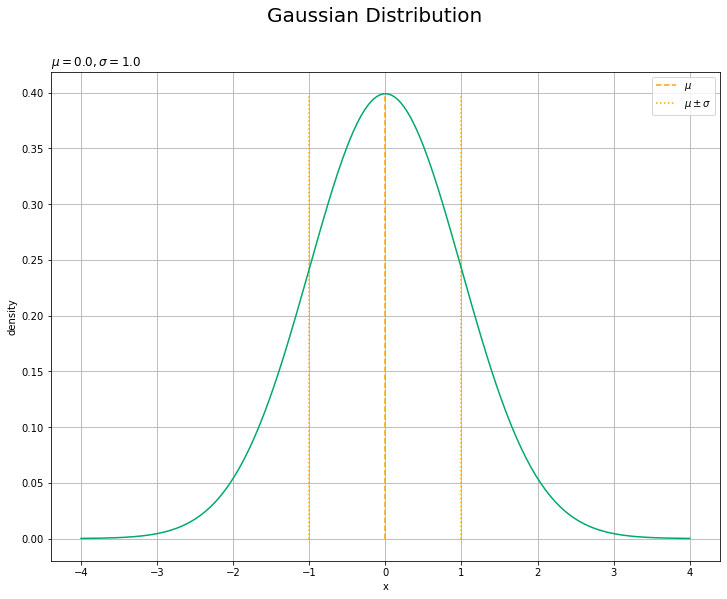

In [14]:
# ガウス分布を作図
plt.figure(figsize=(12, 9)) # 図の設定
plt.plot(x_vals, density, color='#00A968') # 分布
plt.vlines(x=mu, ymin=0.0, ymax=np.max(density), color='orange', linestyle='--', label='$\mu$') # 平均
plt.vlines(x=mu - sigma, ymin=0.0, ymax=np.max(density), color='orange', linestyle=':', label='$\mu \pm \\sigma$') # 平均 - 標準偏差
plt.vlines(x=mu + sigma, ymin=0.0, ymax=np.max(density), color='orange', linestyle=':') # 平均 + 標準偏差
plt.xlabel('x') # x軸ラベル
plt.ylabel('density') # y軸ラベル
plt.suptitle('Gaussian Distribution', fontsize=20) # 全体のタイトル
plt.title('$\mu=' + str(mu) + ', \sigma=' + str(sigma) + '$', loc='left') # タイトル
plt.grid() # グリッド線
plt.legend() # 凡例
plt.show() # 描画

　1次元ガウス分布のグラフを描画できました。  
<br>

## パラメータと分布の形状の関係

　パラメータ$\mu, \sigma$が及ぼす分布への影響をアニメーション(gif画像)で可視化します。  
<br>

### 平均の影響

　平均パラメータ$\mu$の値を少しずつ変更して、分布の変化をアニメーションで確認します。

MovieWriter ffmpeg unavailable; using Pillow instead.


100


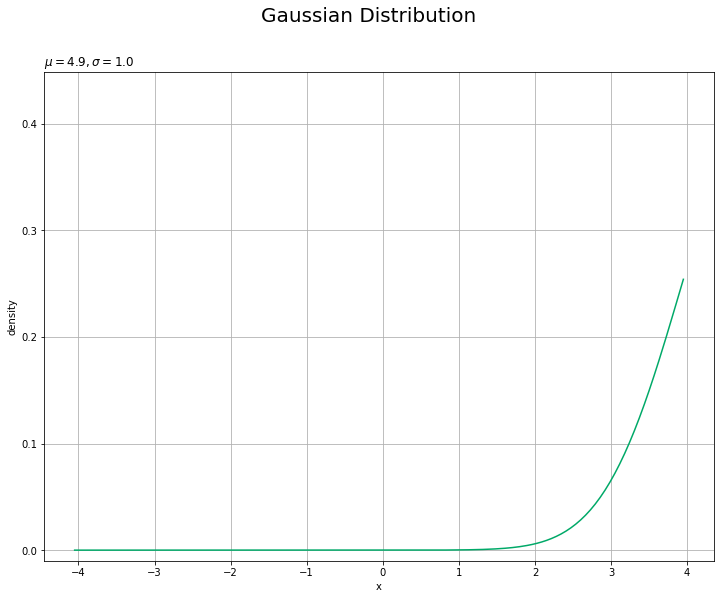

In [15]:
# 平均として利用する値を指定
mu_vals = np.arange(start=-5.0, stop=5.0, step=0.1)
print(len(mu_vals)) # フレーム数

# 標準偏差を指定
sigma = 1.0

# 作図用のxの点を作成
x_vals = np.linspace(start=np.median(mu_vals) - sigma*4.0, stop=np.median(mu_vals) + sigma*4.0, num=250)

# y軸(確率密度)の最大値を設定
dens_max = np.max(norm.pdf(x=x_vals, loc=0.0, scale=sigma)) + 0.05

# 図を初期化
fig = plt.figure(figsize=(12, 9)) # 図の設定
fig.suptitle('Gaussian Distribution', fontsize=20) # 全体のタイトル

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i番目の平均パラメータを取得
    mu = mu_vals[i]
    
    # ガウス分布を計算
    dens = norm.pdf(x=x_vals, loc=mu, scale=sigma)
    
    # ガウス分布を作図
    plt.plot(x_vals, dens, color='#00A968') # 折れ線グラフ
    plt.xlabel('x') # x軸ラベル
    plt.ylabel('density') # y軸ラベル
    plt.title('$\mu=' + str(np.round(mu, 1)) + ', \sigma=' + str(sigma) + '$', loc='left') # タイトル
    plt.grid() # グリッド線
    plt.ylim(ymin=-0.01, ymax=dens_max) # y軸の表示範囲

# gif画像を作成
anime_dens = FuncAnimation(fig, update, frames=len(mu_vals), interval=100)

# gif画像を保存
anime_dens.save('../figure/Python/Gaussian_dens_mu.gif')

　$\mu$が大きくなるに従って、$x$が大きいほど確率密度が大きくなる(山が右に移動する)のを確認できます。  
<br>

### 標準偏差の影響

　標準偏差パラメータ$\sigma$の値を少しずつ変更して、分布の変化をアニメーションで確認します。

MovieWriter ffmpeg unavailable; using Pillow instead.


91


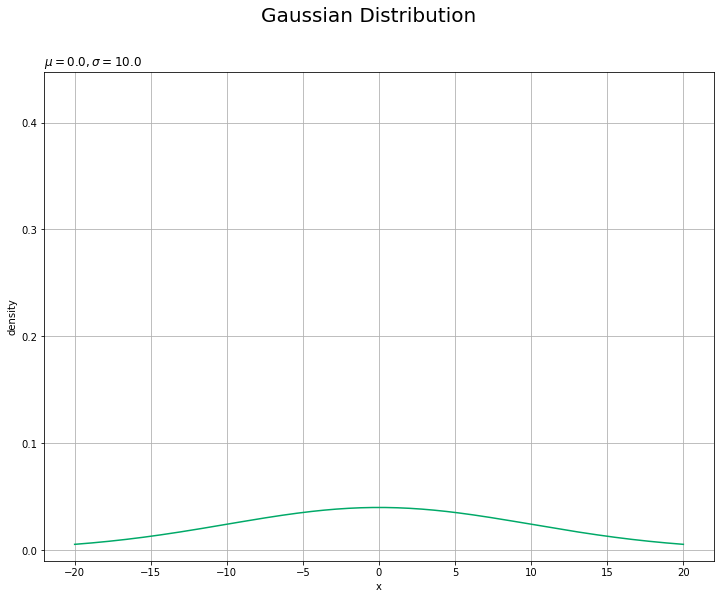

In [16]:
# 標準偏差として利用する値を指定
sigma_vals = np.arange(start=1.0, stop=10.1, step=0.1)
print(len(sigma_vals)) # フレーム数

# 平均を指定
mu = 0.0

# 作図用のxの点を作成
x_vals = np.linspace(start=mu - np.max(sigma_vals)*2.0, stop=mu + np.max(sigma_vals)*2.0, num=250)

# y軸(確率密度)の最大値を設定
dens_max = np.max(norm.pdf(x=x_vals, loc=mu, scale=np.min(sigma_vals))) + 0.05

# 図を初期化
fig = plt.figure(figsize=(12, 9)) # 図の設定
fig.suptitle('Gaussian Distribution', fontsize=20) # 全体のタイトル

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i番目の標準偏差パラメータを取得
    sigma = sigma_vals[i]
    
    # ガウス分布を計算
    dens = norm.pdf(x=x_vals, loc=mu, scale=sigma)
    
    # ガウス分布を作図
    plt.plot(x_vals, dens, color='#00A968') # 折れ線グラフ
    plt.xlabel('x') # x軸ラベル
    plt.ylabel('density') # y軸ラベル
    plt.title('$\mu=' + str(mu) + ', \sigma=' + str(np.round(sigma, 1)) + '$', loc='left') # タイトル
    plt.grid() # グリッド線
    plt.ylim(ymin=-0.01, ymax=dens_max) # y軸の表示範囲

# gif画像を作成
anime_dens = FuncAnimation(fig, update, frames=len(sigma_vals), interval=100)

# gif画像を保存
anime_dens.save('../figure/Python/Gaussian_dens_sigma.gif')

　$\sigma$が大きくなるに従って、裾が広く(山が低く)なるのを確認できます。  
<br>

## 乱数の生成

　1次元ガウス分布の乱数を生成してヒストグラムを確認します。  
<br>

　パラメータを指定して、1次元ガウス分布に従う乱数を生成します。

In [17]:
# 平均を指定
mu = 1.0

# 標準偏差を指定
sigma = 2.5

# データ数を指定
N = 1000

# ガウス分布に従う乱数を生成
x_n = np.random.normal(loc=mu, scale=sigma, size=N)
print(x_n[:5])

[ 5.39066457 -0.73359572  0.02781031  0.14934589 -2.15685795]


　1次元ガウス分布の乱数は、`NumPy`ライブラリの`random`モジュールの乱数生成関数`normal()`で生成できます。平均の引数`loc`に`mu`、標準偏差の引数`scale`に`sigma`、データ数(サンプルサイズ)の引数`size`に`N`を指定します。  

　作図に利用するため、$x$の値と分布を作成しておきます。

In [18]:
# 作図用のxの点を作成
x_vals = np.linspace(mu - sigma*4.0, mu + sigma*4.0, num=250)

# ガウス分布を計算
density = norm.pdf(x=x_vals, loc=mu, scale=sigma)

<br>

　ヒストグラムを作成します。

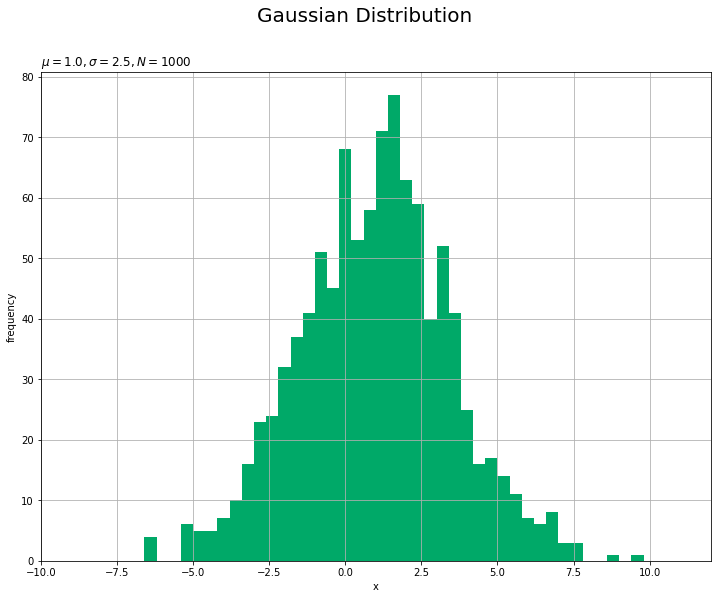

In [19]:
# サンプルのヒストグラムを作成
plt.figure(figsize=(12, 9)) # 図の設定
plt.hist(x=x_n, bins=50, range=(x_vals.min(), x_vals.max()), color='#00A968') # ヒストグラム
plt.xlabel('x') # x軸ラベル
plt.ylabel('frequency') # y軸ラベル
plt.suptitle('Gaussian Distribution', fontsize=20) # 全体のタイトル
plt.title('$\mu=' + str(mu) + ', \sigma=' + str(sigma) + ', N=' + str(N) + '$', loc='left') # タイトル
plt.grid() # グリッド線
plt.show() # 描画

　`pyplot.hist()`でヒストグラムを作成します。`bins`引数に区切り数、`range`引数に区切り位置を指定します。この例では、`x_vals`の最小値から最大値を範囲とします。  

　サンプルの密度を分布と重ねて描画します。

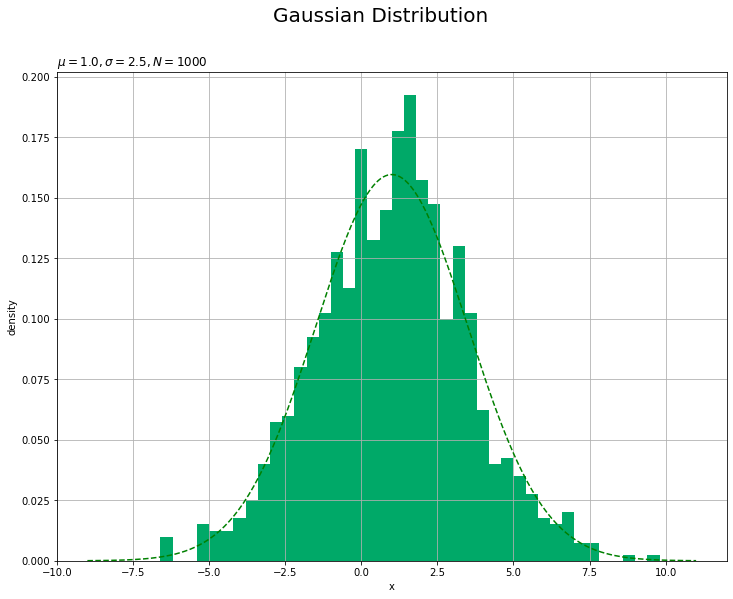

In [20]:
# サンプルのヒストグラムを作成
plt.figure(figsize=(12, 9)) # 図の設定
plt.hist(x=x_n, bins=50, range=(x_vals.min(), x_vals.max()), density=True, color='#00A968') # ヒストグラム
plt.plot(x_vals, density, color='green', linestyle='--') # 元の分布
plt.xlabel('x') # x軸ラベル
plt.ylabel('density') # y軸ラベル
plt.suptitle('Gaussian Distribution', fontsize=20) # 全体のタイトル
plt.title('$\mu=' + str(mu) + ', \sigma=' + str(sigma) + ', N=' + str(N) + '$', loc='left') # タイトル
plt.grid() # グリッド線
plt.show() # 描画

　`pyplot.hist()`に`density=True`を指定すると、頻度を密度に変換して描画します。  

　データ数が十分に増えると元の分布(破線のグラフ)に形が近付きます。  
<br>

　サンプルサイズとヒストグラムの変化をアニメーションで確認します。乱数を1つずつ取り出して作図します。  

　ヒストグラムのアニメーションを作成します。

MovieWriter ffmpeg unavailable; using Pillow instead.


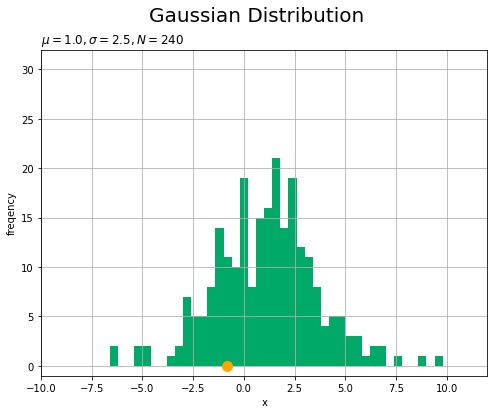

In [21]:
# フレーム数を指定
N_frame = 240

# 図を初期化
fig = plt.figure(figsize=(8, 6)) # 図の設定
fig.suptitle('Gaussian Distribution', fontsize=20) # 全体のタイトル

# y軸(頻度)の最大値を設定
freq_max = np.max(
    np.histogram(a=x_n[:N_frame], bins=30, range=(x_vals.min(), x_vals.max()))[0], 
) + 1.0

# 作図処理を関数として定義
def update(n):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # サンプルのヒストグラムを作成
    plt.hist(x=x_n[:(n+1)], bins=50, range=(x_vals.min(), x_vals.max()), color='#00A968', zorder=1) # ヒストグラム
    plt.scatter(x=x_n[n], y=0.0, color='orange', s=100, zorder=2) # サンプル
    plt.xlabel('x') # x軸ラベル
    plt.ylabel('freqency') # y軸ラベル
    plt.suptitle('Gaussian Distribution', fontsize=20) # 全体のタイトル
    plt.title('$\mu=' + str(mu) + ', \sigma=' + str(sigma) + 
              ', N=' + str(n + 1) + '$', loc='left') # タイトル
    plt.grid() # グリッド線
    plt.ylim(ymin=-1.0, ymax=freq_max) # y軸の表示範囲

# gif画像を作成
anime_freq = FuncAnimation(fig, update, frames=N_frame, interval=100)

# gif画像を保存
anime_freq.save('../figure/Python/Gaussian_freq.gif')

<br>

　密度のアニメーションを作成します。

MovieWriter ffmpeg unavailable; using Pillow instead.


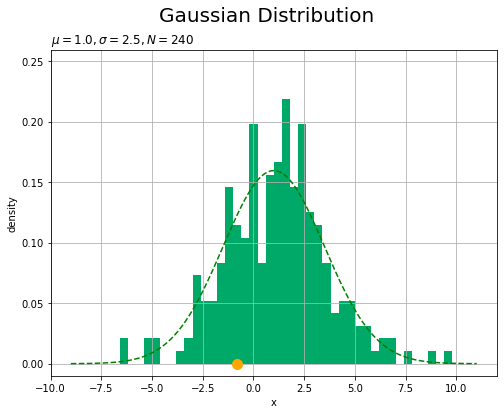

In [22]:
# フレーム数を指定
N_frame = 240

# 図を初期化
fig = plt.figure(figsize=(8, 6)) # 図の設定
fig.suptitle('Gaussian Distribution', fontsize=20) # 全体のタイトル

# 作図処理を関数として定義
def update(n):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # サンプルのヒストグラムを作成
    plt.hist(x=x_n[:(n+1)], bins=50, range=(x_vals.min(), x_vals.max()), density=True, color='#00A968', zorder=1) # ヒストグラム
    plt.plot(x_vals, density, color='green', linestyle='--', zorder=2) # 元の分布
    plt.scatter(x=x_n[n], y=0.0, color='orange', s=100, zorder=3) # サンプル
    plt.xlabel('x') # x軸ラベル
    plt.ylabel('density') # y軸ラベル
    plt.suptitle('Gaussian Distribution', fontsize=20) # 全体のタイトル
    plt.title('$\mu=' + str(mu) + ', \sigma=' + str(sigma) + 
              ', N=' + str(n + 1) + '$', loc='left') # タイトル
    plt.grid() # グリッド線
    plt.ylim(ymin=-0.01, ymax=density.max() + 0.1) # y軸の表示範囲

# gif画像を作成
anime_prop = FuncAnimation(fig, update, frames=N_frame, interval=100)

# gif画像を保存
anime_prop.save('../figure/Python/Gaussian_prop.gif')

　サンプルが増えるに従って、元の分布に近付くのを確認できます。  
<br>

## 分布の生成

　1次元ガウス分布が共役事前分布となる1次元ガウス分布の平均パラメータを生成して分布を作図します。  
<br>

　平均$\mu_{\mathrm{prior}}$・標準偏差$\sigma_{\mathrm{prior}}$・分散$\sigma_{\mathrm{prior}}^2$の1次元ガウス分布

$$
\mathcal{N}(\mu | \mu_{\mathrm{prior}}, \sigma_{\mathrm{prior}}^2)
    = \frac{1}{\sqrt{2 \pi \sigma_{\mathrm{prior}}^2}}
      \exp \left(
          - \frac{(x - \mu_{\mathrm{prior}})^2}{2 \sigma_{\mathrm{prior}}^2}
      \right)
$$

を事前分布として、$\mu$を生成します。  
　生成した$\mu$を平均として用いて、標準偏差$\sigma$・分散$\sigma^2$の1次元ガウス分布

$$
\mathcal{N}(x | \mu, \sigma^2)
    = \frac{1}{\sqrt{2 \pi \sigma^2}}
      \exp \left(
          - \frac{(x - \mu)^2}{2 \sigma^2}
      \right)
$$

を描画します。  
<br>

　平均パラメータ$\mu$を生成します。

In [29]:
# 超パラメータを指定
mu_prior = 1.0
sigma_prior = 2.5

# サンプルサイズを指定
N = 10

# 1次元ガウス分布の平均パラメータを生成
mu_n = np.random.normal(loc=mu_prior, scale=sigma_prior, size=N)
print(mu_n[:5])

[-1.52913518  0.84518282 -1.24233217  8.26459852  2.34859189]


　事前ガウス分布のパラメータ(超パラメータ)$\mu_{\mathrm{prior}}, \sigma_{\mathrm{prior}}$を指定して、1次元ガウス分布に従う乱数を生成し、平均パラメータ$\mu$として利用します。  

　まずは、目安となるように$\mu$の期待値$\mathbb{E}[\mu]$による分布を求めます。

In [30]:
# 標準偏差パラメータを指定
sigma = 1.0

# 平均パラメータを計算
E_mu = mu_prior

# 作図用のxの点を作成
x_vals = np.linspace(E_mu - sigma*5.0, E_mu + sigma*5.0, num=250)
print(x_vals[:5])

# 平均パラメータの期待値による1次元ガウス分布の確率密度を計算
E_dens = norm.pdf(x=x_vals, loc=E_mu, scale=sigma)
print(E_dens[:5])

[-4.         -3.95983936 -3.91967871 -3.87951807 -3.83935743]
[1.48671951e-06 1.81587746e-06 2.21433625e-06 2.69587740e-06
 3.27684759e-06]


　平均パラメータの期待値$\mathbb{E}[\mu] = \mu_{\mathrm{prior}}$を`E_lambda`とします。  
　生成された1次元ガウス分布の標準偏差パラメータ$\sigma$を(既知の値として)指定します。  

　$x$として利用する値を作成して`x_vals`とします。この例では、平均`E_mu`を中心に標準偏差の`sigma`の`5`倍を範囲とします。  
　`norm.pdf()`で1次元ガウス分布の確率密度を計算します。平均の引数`loc`に`E_mu`、標準偏差の引数`scale`に`sigma`を指定します。  

　$N + 1$個の1次元ガウス分布を作図します。パラメータのサンプル`mu_n`の値ごとに分布を計算します。

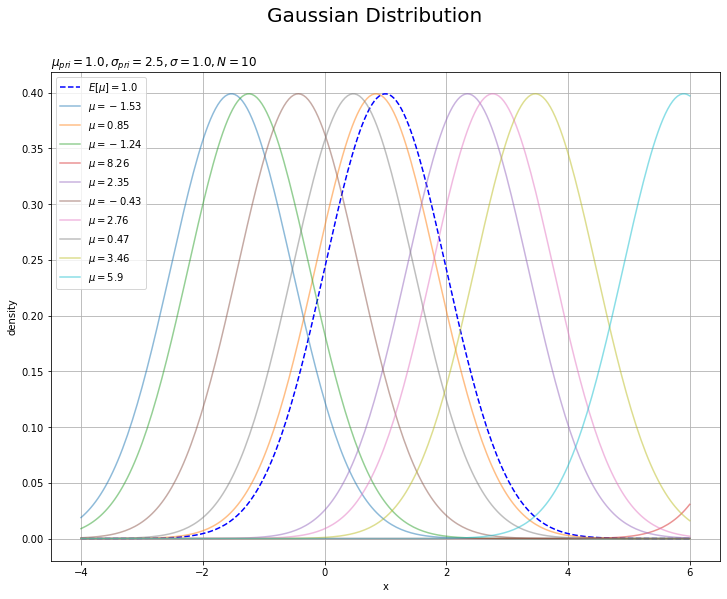

In [31]:
# サンプルによる分布を作図
plt.figure(figsize=(12, 9)) # 図の設定
plt.plot(x_vals, E_dens, color='blue', linestyle='--', label='$E[\mu]=' + str(E_mu) + '$') # 期待値による分布
for n in range(N):
    tmp_dens = norm.pdf(x=x_vals, loc=mu_n[n], scale=sigma)
    plt.plot(x_vals, tmp_dens, alpha=0.5, label='$\mu=' + str(np.round(mu_n[n], 2)) + '$') # サンプルによる分布
plt.xlabel('x') # x軸ラベル
plt.ylabel('density') # y軸ラベル
plt.suptitle('Gaussian Distribution', fontsize=20) # 全体のタイトル
plt.title('$\mu_{pri}=' + str(mu_prior) + ', \sigma_{pri}=' + str(sigma_prior) + 
          ', \sigma=' + str(sigma) + ', N=' + str(N) + '$', loc='left') # タイトル
plt.legend() # 凡例
plt.grid() # グリッド線
plt.show() # 描画

　期待値による分布(破線)を中心に分布しています。  
<br>